StimulationDevice class demonstration
=====================================

Assumptions:
- This is intended to function as a generic device class for multiprimary stimulators. 
- devices are additive
- calibration is stationary
- expect values as W/m2/nm

In [2]:
import sys
sys.path.insert(0, '../')
import random

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from silentsub.device import StimulationDevice

sns.set_context('notebook')
sns.set_style('whitegrid')

Load data with pandas -- this is our starting point
---------------------------------------------------

In [3]:
spds = pd.read_csv('../data/S2_corrected_oo_spectra.csv', index_col=['led','intensity'])
spds.index.rename(['Primary', 'Setting'], inplace=True)
spds.columns = pd.Int64Index(spds.columns.astype(int))
spds.columns.name = 'Wavelength'
spds

Wavelength            380       381       382       383       384       385  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        65       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        130      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        195      0.000026  0.000017  0.000041  0.000015  0.000036  0.000039   
        260      0.000141  0.000147  0.000168  0.000170  0.000155  0.000144   
...                   ...       ...       ...       ...       ...       ...   
9       3835     0.003609  0.004056  0.003476  0.003724  0.002943  0.003147   
        3900     0.003415  0.003666  0.003451  0.003724  0.002873  0.003021   
        3965     0.003560  0.003867  0.003539  0.003874  0.003191  0.003165   
        4030     0.003738  0.003652  0.003557  0.003737  0.002973  0.003205   
        4095     0.003459  0.004063  0.003610  0.004071  0.003099  0.003373   

Wavelength            386       387       388       389  ...       771  \
Primary Setting                                          ...             
0       0        0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        65       0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        130      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        195      0.000022  0.000032  0.000026  0.000021  ...  0.000022   
        260      0.000154  0.000121  0.000167  0.000169  ...  0.000088   
...                   ...       ...       ...       ...  ...       ...   
9       3835     0.003482  0.002543  0.003630  0.004153  ...  0.002318   
        3900     0.003112  0.002289  0.003514  0.004000  ...  0.002279   
        3965     0.003544  0.002428  0.003695  0.004005  ...  0.002134   
        4030     0.003420  0.002227  0.003520  0.003932  ...  0.002444   
        4095     0.003231  0.002468  0.003654  0.004141  ...  0.002274   

Wavelength                772       773       774       775       776  \
Primary Setting                                                         
0       0        0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        65       0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        130      0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        195      5.119073e-07  0.000008  0.000009  0.000000  0.000015   
        260      7.298278e-05  0.000088  0.000081  0.000071  0.000086   
...                       ...       ...       ...       ...       ...   
9       3835     2.590713e-03  0.002629  0.002536  0.002962  0.002583   
        3900     2.669694e-03  0.002370  0.002300  0.002815  0.002574   
        3965     2.682856e-03  0.002604  0.002552  0.002775  0.002638   
        4030     2.647269e-03  0.002541  0.002408  0.002702  0.002547   
        4095     2.544598e-03  0.002587  0.002493  0.002923  0.002699   

Wavelength            777       778       779       780  
Primary Setting                                          
0       0        0.000000  0.000011  0.000000  0.000000  
        65       0.000000  0.000000  0.000000  0.000000  
        130      0.000000  0.000000  0.000000  0.000000  
        195      0.000012  0.000000  0.000018  0.000000  
        260      0.000086  0.000010  0.000100  0.000078  
...                   ...       ...       ...       ...  
9       3835     0.002606  0.002213  0.002467  0.002924  
        3900     0.002412  0.002107  0.002590  0.002938  
        3965     0.002748  0.002137  0.002676  0.002664  
        4030     0.002385  0.002038  0.002477  0.002837  
        4095     0.002592  0.002177  0.002471  0.002698  

[640 rows x 401 columns]

Instantiate `StimulationDevice` class
-------------------------------------

In [3]:
# list of colors for the primaries
colors = ['blueviolet', 'royalblue', 'darkblue', 'blue', 'cyan', 
          'green', 'lime', 'orange', 'red', 'darkred']

# instantiate the class
device = StimulationDevice(
    resolutions=[4095]*10,
    colors=colors,
    spds=spds,
    spd_binwidth=1)

Plot the SPDs
-------------

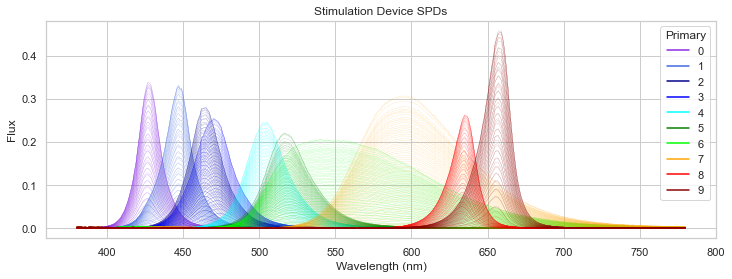

In [4]:
_ = device.plot_spds()

Plot the gamut of the device on CIE 1931 horseshoe
--------------------------------------------------

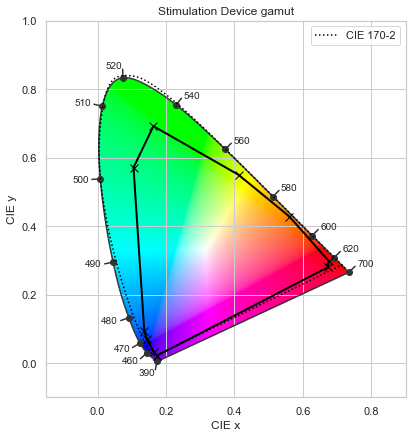

In [5]:
_ = device.plot_gamut()

Fit curves to irradiance data and save parameters
-------------------------------------------------

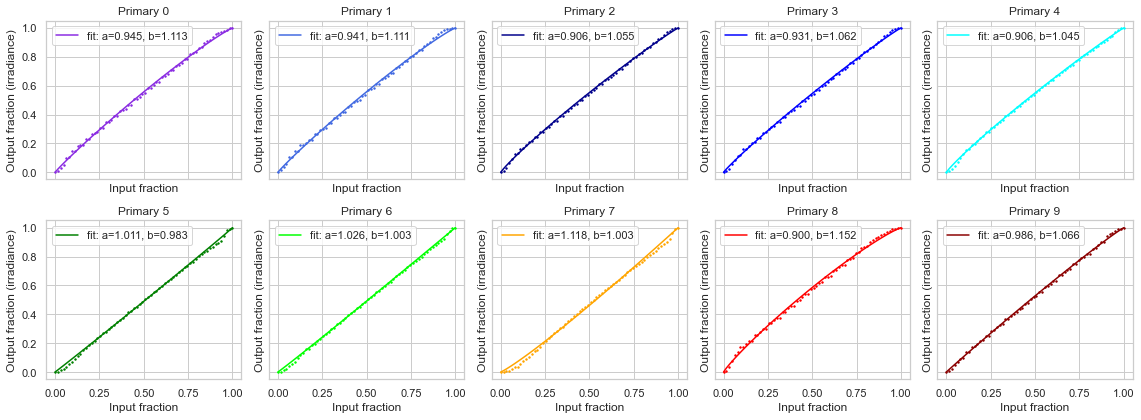

In [6]:
_ = device.fit_curves()

In [7]:
device.curveparams

{0: array([ 0.94535682,  1.11308505]),
 1: array([ 0.9412053 ,  1.11100174]),
 2: array([ 0.9062091 ,  1.05497867]),
 3: array([ 0.93134223,  1.06216012]),
 4: array([ 0.90583305,  1.04549048]),
 5: array([ 1.01121749,  0.98320879]),
 6: array([ 1.02581632,  1.00250189]),
 7: array([ 1.11789541,  1.00330554]),
 8: array([ 0.9001832 ,  1.15218154]),
 9: array([ 0.98581173,  1.06568807])}

Inspect data
------------

In [8]:
device.spds

Wavelength            380       381       382       383       384       385  \
Primary Setting                                                               
0       0        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        65       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        130      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
        195      0.000026  0.000017  0.000041  0.000015  0.000036  0.000039   
        260      0.000141  0.000147  0.000168  0.000170  0.000155  0.000144   
...                   ...       ...       ...       ...       ...       ...   
9       3835     0.003609  0.004056  0.003476  0.003724  0.002943  0.003147   
        3900     0.003415  0.003666  0.003451  0.003724  0.002873  0.003021   
        3965     0.003560  0.003867  0.003539  0.003874  0.003191  0.003165   
        4030     0.003738  0.003652  0.003557  0.003737  0.002973  0.003205   
        4095     0.003459  0.004063  0.003610  0.004071  0.003099  0.003373   

Wavelength            386       387       388       389  ...       771  \
Primary Setting                                          ...             
0       0        0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        65       0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        130      0.000000  0.000000  0.000000  0.000000  ...  0.000000   
        195      0.000022  0.000032  0.000026  0.000021  ...  0.000022   
        260      0.000154  0.000121  0.000167  0.000169  ...  0.000088   
...                   ...       ...       ...       ...  ...       ...   
9       3835     0.003482  0.002543  0.003630  0.004153  ...  0.002318   
        3900     0.003112  0.002289  0.003514  0.004000  ...  0.002279   
        3965     0.003544  0.002428  0.003695  0.004005  ...  0.002134   
        4030     0.003420  0.002227  0.003520  0.003932  ...  0.002444   
        4095     0.003231  0.002468  0.003654  0.004141  ...  0.002274   

Wavelength                772       773       774       775       776  \
Primary Setting                                                         
0       0        0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        65       0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        130      0.000000e+00  0.000000  0.000000  0.000000  0.000000   
        195      5.119073e-07  0.000008  0.000009  0.000000  0.000015   
        260      7.298278e-05  0.000088  0.000081  0.000071  0.000086   
...                       ...       ...       ...       ...       ...   
9       3835     2.590713e-03  0.002629  0.002536  0.002962  0.002583   
        3900     2.669694e-03  0.002370  0.002300  0.002815  0.002574   
        3965     2.682856e-03  0.002604  0.002552  0.002775  0.002638   
        4030     2.647269e-03  0.002541  0.002408  0.002702  0.002547   
        4095     2.544598e-03  0.002587  0.002493  0.002923  0.002699   

Wavelength            777       778       779       780  
Primary Setting                                          
0       0        0.000000  0.000011  0.000000  0.000000  
        65       0.000000  0.000000  0.000000  0.000000  
        130      0.000000  0.000000  0.000000  0.000000  
        195      0.000012  0.000000  0.000018  0.000000  
        260      0.000086  0.000010  0.000100  0.000078  
...                   ...       ...       ...       ...  
9       3835     0.002606  0.002213  0.002467  0.002924  
        3900     0.002412  0.002107  0.002590  0.002938  
        3965     0.002748  0.002137  0.002676  0.002664  
        4030     0.002385  0.002038  0.002477  0.002837  
        4095     0.002592  0.002177  0.002471  0.002698  

[640 rows x 401 columns]

In [9]:
device.aopic

S         M         L             R             I
Primary Setting                                                              
0       0        1.652849e-10  0.000008  0.000034  6.066599e-07  7.991283e-08
        65       4.464621e-02  0.003514  0.002485  1.233052e-02  1.564583e-02
        130      1.260046e-01  0.011021  0.008438  3.573582e-02  4.506167e-02
        195      2.300100e-01  0.022206  0.017821  6.708515e-02  8.387576e-02
        260      4.486615e-01  0.046677  0.038688  1.338053e-01  1.662003e-01
...                       ...       ...       ...           ...           ...
9       3835     1.131181e-01  0.303766  1.638506  1.512043e-01  1.372340e-01
        3900     1.098176e-01  0.303805  1.666707  1.467185e-01  1.325618e-01
        3965     1.124645e-01  0.308965  1.682529  1.508817e-01  1.363681e-01
        4030     1.106837e-01  0.306781  1.680621  1.482401e-01  1.337844e-01
        4095     1.136898e-01  0.312333  1.699980  1.526881e-01  1.381907e-01

[640 rows x 5 columns]

In [10]:
device.lux

lux
Primary Setting            
0       0          0.017435
        65         0.514050
        130        2.309800
        195        5.712634
        260       13.561652
...                     ...
9       3835     825.349635
        3900     838.921762
        3965     847.231635
        4030     846.052980
        4095     855.999432

[640 rows x 1 columns]

In [11]:
device.irradiance

Irradiance
Primary Setting            
0       0          0.000133
        65         0.066206
        130        0.190105
        195        0.353922
        260        0.708019
...                     ...
9       3835      11.118653
        3900      11.343077
        3965      11.471153
        4030      11.479855
        4095      11.583233

[640 rows x 1 columns]

Predict output for a specific primary at a given setting
--------------------------------------------------------

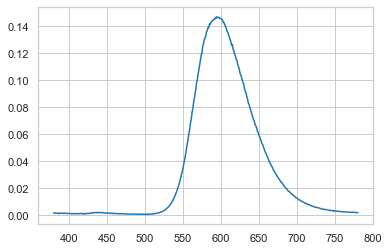

In [12]:
primary_spd = device.predict_primary_spd(primary=7, setting=.5)
plt.plot(device.wls, primary_spd);

Predict output for random device settings
-----------------------------------------

Output for device settings: [1948, 1155, 28, 90, 948, 5, 788, 2032, 3964, 15]


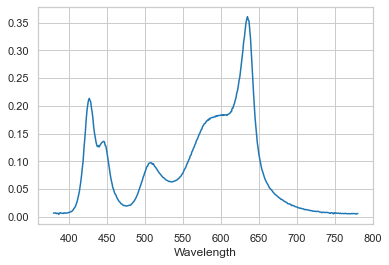

In [13]:
settings = [random.randrange(s) for s in device.resolutions] # using a list of integers
device_spd = device.predict_multiprimary_spd(settings)
device_spd.T.plot(legend=False);
print(f'Output for device settings: {settings}')

Output for device settings: [0.7715078268105979, 0.15078894697066503, 0.9573046419626677, 0.19722148654509464, 0.37381052416614335, 0.16487393293894514, 0.8206435594971392, 0.7745423070074509, 0.5078787587952099, 0.20287912786165596]


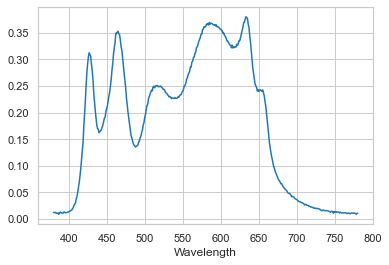

In [14]:
weights = [random.uniform(0, 1) for s in device.resolutions] # using a list of float
device_spd = device.predict_multiprimary_spd(weights)
device_spd.T.plot(legend=False);
print(f'Output for device settings: {weights}')

Predict *a*-opic irradiances for a list of device settings and plot with nice colours
--------------------------------------------------------------------------------------

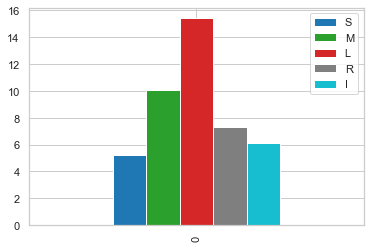

In [15]:
device_ao = device.predict_multiprimary_aopic(settings)
device_ao.plot(kind='bar', color=device.aopic_colors);

Convert settings to weights and weights to settings
---------------------------------------------------

In [16]:
device.settings_to_weights(settings)

[0.4757020757020757,
 0.28205128205128205,
 0.006837606837606838,
 0.02197802197802198,
 0.2315018315018315,
 0.001221001221001221,
 0.19242979242979244,
 0.49621489621489623,
 0.968009768009768,
 0.003663003663003663]